In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [95]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [96]:
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Data Frame Dimensions:
Lines:		232725
Columns:	18


In [97]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


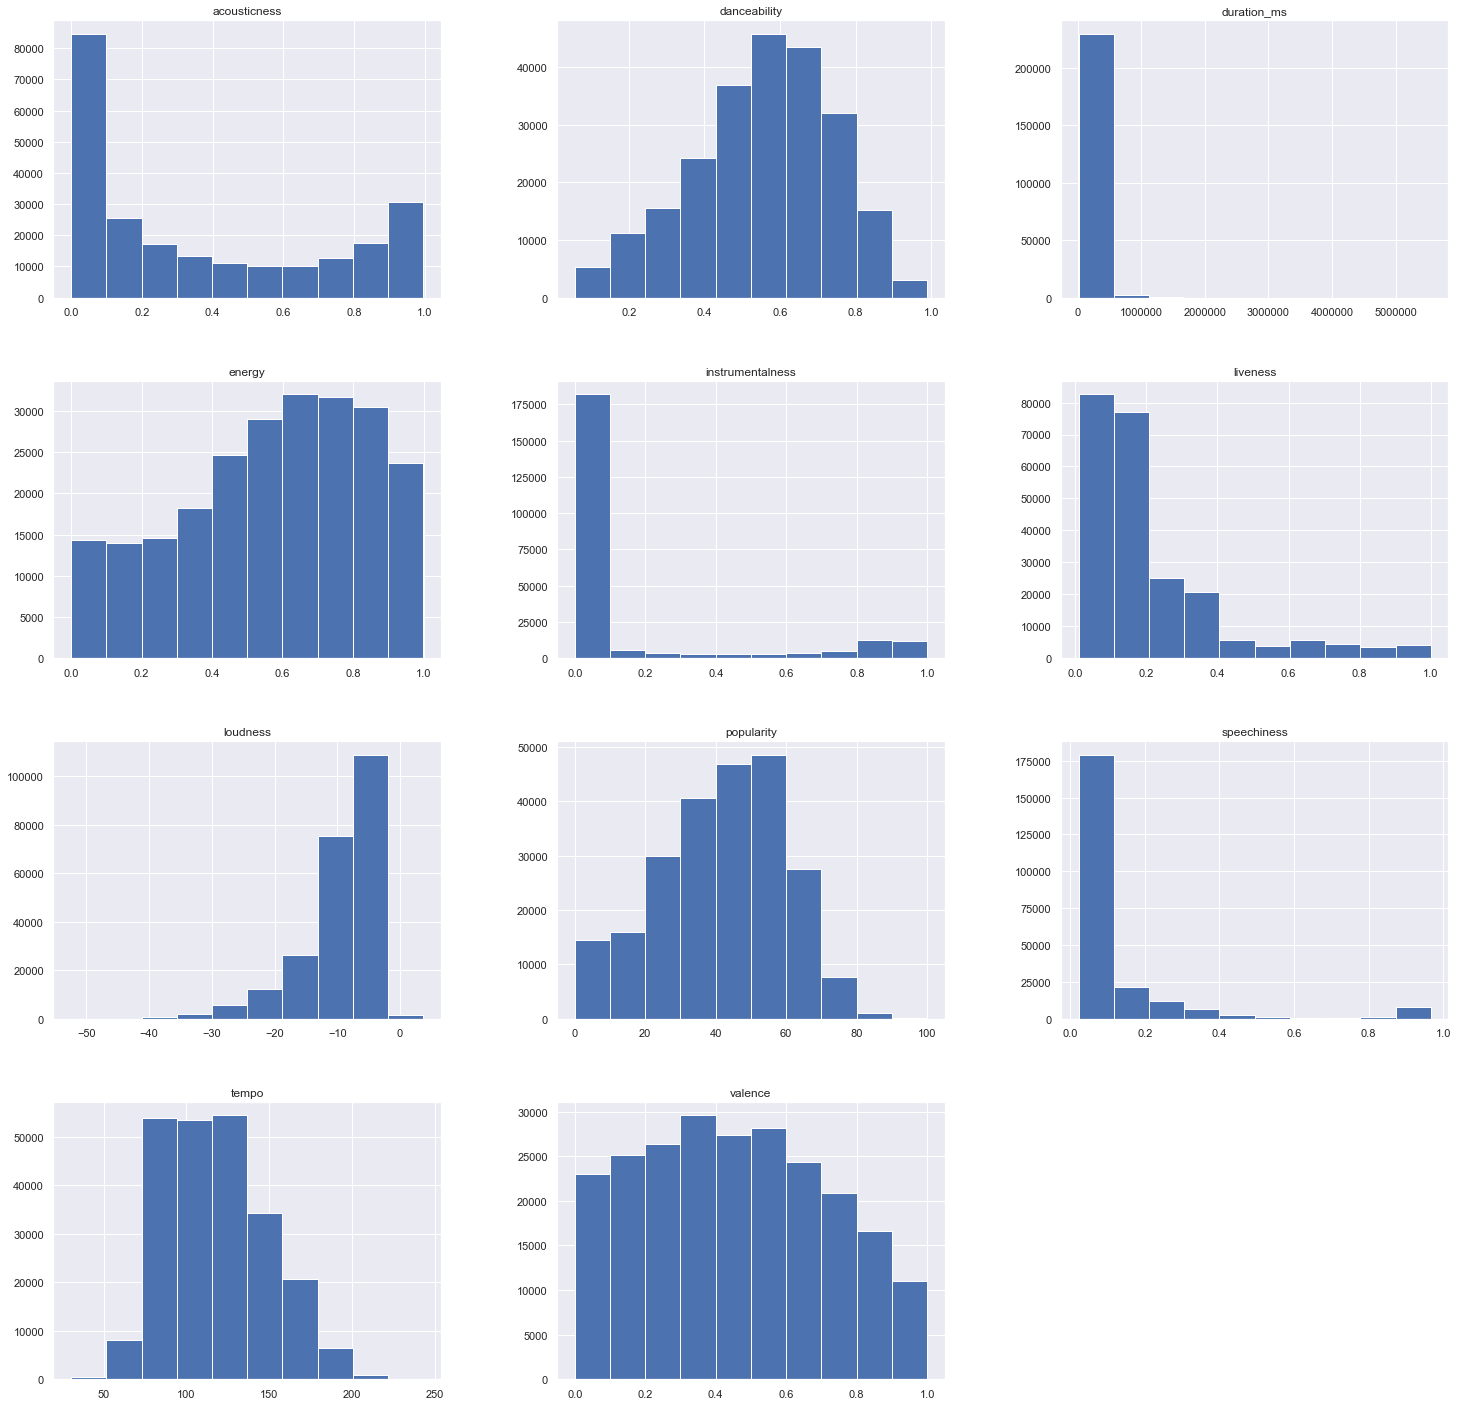

In [98]:
df.hist(figsize=(25,25));

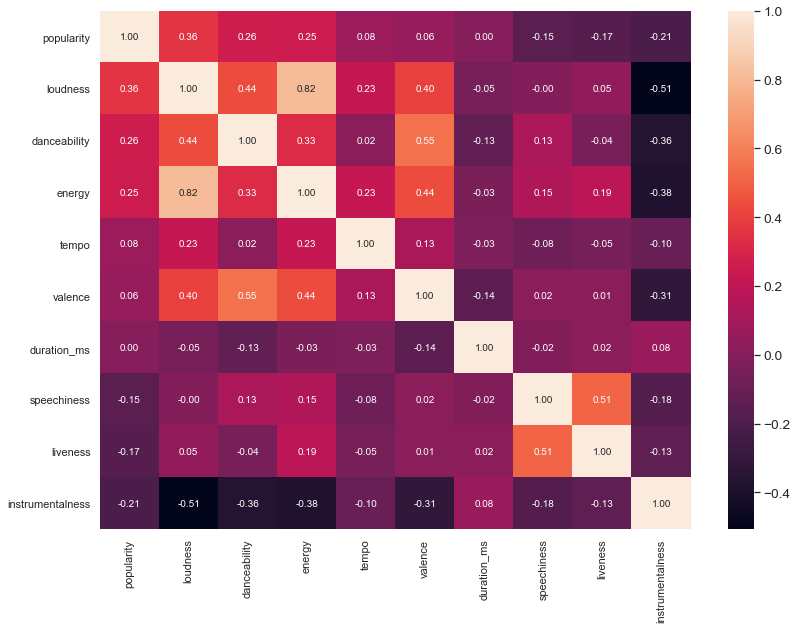

In [99]:

corr = df.corr()


# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

In [100]:

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [101]:
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:300]

In [102]:

# creating a dataframe without the categorical features
df_cluster  = df.drop(columns = ['genre','artist_name','track_name','track_id','key','mode','time_signature'])

In [103]:
X=df_cluster.head(300)
print(X.shape)
X.head()

(300, 11)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [104]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(1)



1
1
1
1
1
1
1
1
1
1
1


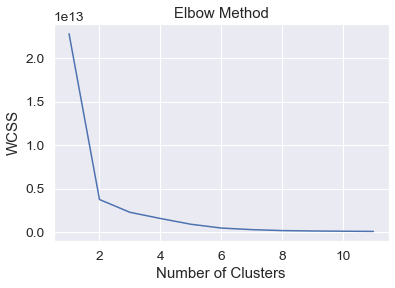

In [105]:
plt.plot(range(1,12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [106]:

# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [107]:
scaled = scaler.fit_transform(X)

In [108]:

# instantiating model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

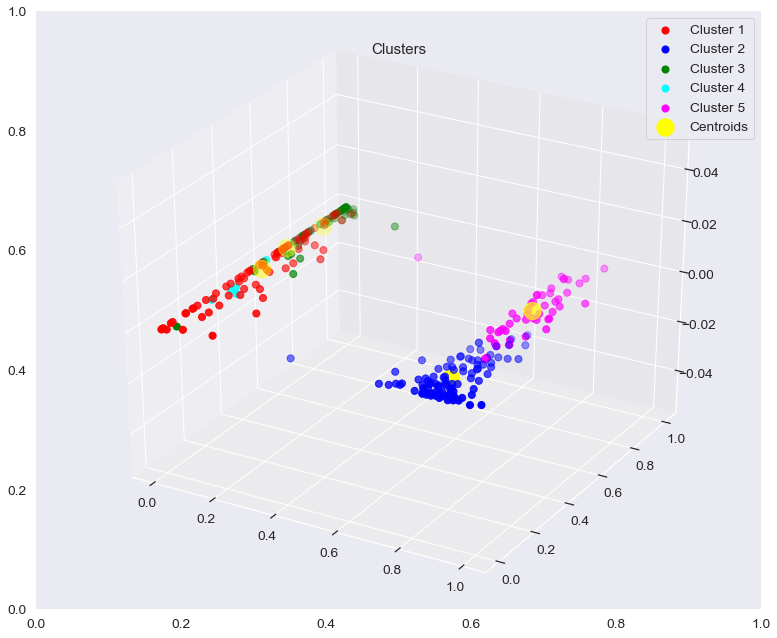

In [109]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [110]:
y_kmeans


array([0, 0, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 0, 0, 2, 3, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 2, 0,
       3, 0, 0, 0, 0, 0, 2, 0, 3, 2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 3, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 3, 0, 0, 2, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4,
       4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4,
       1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 1, 1,
       4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 2, 2, 0, 3, 2, 2, 0, 2, 0, 0])

In [111]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(300, 1)


,k_cluster
0,0
1,0
2,2
3,2
4,2


In [114]:

# concatenating the cluster column to the dataframe
df_cluster = pd.concat([X, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head(10)

(300, 12)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,k_cluster
0,0,0.61100,0.389,99373,0.9100,0.00000,0.3460,-1.828,0.0525,166.969,0.814,0
1,1,0.24600,0.590,137373,0.7370,0.00000,0.1510,-5.559,0.0868,174.003,0.816,0
2,3,0.95200,0.663,170267,0.1310,0.00000,0.1030,-13.879,0.0362,99.488,0.368,2
3,0,0.70300,0.240,152427,0.3260,0.00000,0.0985,-12.178,0.0395,171.758,0.227,2
4,4,0.95000,0.331,82625,0.2250,0.12300,0.2020,-21.150,0.0456,140.576,0.390,2
5,0,0.74900,0.578,160627,0.0948,0.00000,0.1070,-14.970,0.1430,87.479,0.358,2
6,2,0.34400,0.703,212293,0.2700,0.00000,0.1050,-12.675,0.9530,82.873,0.533,3
7,15,0.93900,0.416,240067,0.2690,0.00000,0.1130,-8.949,0.0286,96.827,0.274,2
8,0,0.00104,0.734,226200,0.4810,0.00086,0.0765,-7.725,0.0460,125.080,0.765,0
9,10,0.31900,0.598,152694,0.7050,0.00125,0.3490,-7.790,0.0281,137.496,0.718,0


In [115]:

# checking for null
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

k_cluster           0.0
valence             0.0
tempo               0.0
speechiness         0.0
loudness            0.0
liveness            0.0
instrumentalness    0.0
energy              0.0
duration_ms         0.0
danceability        0.0
acousticness        0.0
popularity          0.0
dtype: float64

In [116]:

# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
1    64.474227
4    63.106383
0     1.759494
2     1.160714
3     0.523810
Name: popularity, dtype: float64

In [117]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

1    97
0    79
2    56
4    47
3    21
Name: k_cluster, dtype: int64

In [118]:
df_cluster.groupby("k_cluster").describe()

popularity                                                     \
               count       mean       std   min   25%   50%   75%   max   
k_cluster                                                                 
0               79.0   1.759494  2.914223   0.0   0.0   0.0   3.0  13.0   
1               97.0  64.474227  5.537924  31.0  62.0  65.0  68.0  76.0   
2               56.0   1.160714  2.528217   0.0   0.0   0.0   1.0  15.0   
3               21.0   0.523810  1.030488   0.0   0.0   0.0   1.0   4.0   
4               47.0  63.106383  5.931618  28.0  61.5  64.0  66.0  71.0   

          acousticness                                                        \
                 count      mean       std       min      25%     50%    75%   
k_cluster                                                                      
0                 79.0  0.487264  0.270030  0.001040  0.28250  0.5130  0.679   
1                 97.0  0.127053  0.121221  0.000582  0.02530  0.0761  0.210   
2                 56.0  0.835916  0.188725  0.038300  0.74375  0.9250  0.971   
3                 21.0  0.650095  0.201511  0.237000  0.54800  0.7120  0.778   
4                 47.0  0.617447  0.169530  0.277000  0.46850  0.6110  0.730   

                 danceability                                              \
             max        count      mean       std    min      25%     50%   
k_cluster                                                                   
0          0.958         79.0  0.627747  0.129284  0.388  0.52350  0.6320   
1          0.470         97.0  0.679155  0.112010  0.344  0.59600  0.6840   
2          0.993         56.0  0.388732  0.148247  0.108  0.28825  0.3845   
3          0.924         21.0  0.646429  0.072845  0.483  0.58800  0.6430   
4          0.975         47.0  0.591426  0.142186  0.259  0.50600  0.6490   

                          duration_ms                                          \
               75%    max       count           mean            std       min   
k_cluster                                                                       
0          0.70550  0.914        79.0  193054.784810   86774.382566   22413.0   
1          0.75200  0.912        97.0  216600.154639   35948.339035  118393.0   
2          0.49425  0.805        56.0  207640.839286  152949.128671   18800.0   
3          0.70300  0.775        21.0  623129.000000  930810.002647   49373.0   
4          0.69550  0.789        47.0  222324.893617   48573.802835  144000.0   

                                                    energy            \
                25%       50%        75%        max  count      mean   
k_cluster                                                              
0          146400.0  181441.0  225753.50   515613.0   79.0  0.596013   
1          197720.0  215385.0  233601.00   377467.0   97.0  0.623000   
2          134407.5  174766.5  236082.25  1029560.0   56.0  0.203531   
3          176280.0  212293.0  492813.00  3435625.0   21.0  0.319762   
4          187215.0  212973.0  244766.50   357357.0   47.0  0.452574   

                                                            instrumentalness  \
                std      min     25%    50%      75%    max            count   
k_cluster                                                                      
0          0.174090  0.22400  0.4650  0.605  0.70300  0.953             79.0   
1          0.130615  0.29100  0.5210  0.620  0.71000  0.886             97.0   
2          0.120208  0.00154  0.1280  0.178  0.28075  0.477             56.0   
3          0.123473  0.14700  0.2310  0.283  0.40500  0.606             21.0   
4          0.113818  0.25500  0.3565  0.429  0.51000  0.762             47.0   

                                                                               \
                   mean           std  min  25%       50%       75%       max   
k_cluster                                                                       
0          5.445716e-03  2.756029e-02  0.